In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
rcParams['font.size'] = 20
plt.style.use('ggplot')

In [2]:
x = np.arange(-3.0, 3.0, 0.01)

In [3]:
def linear(x):
    return x

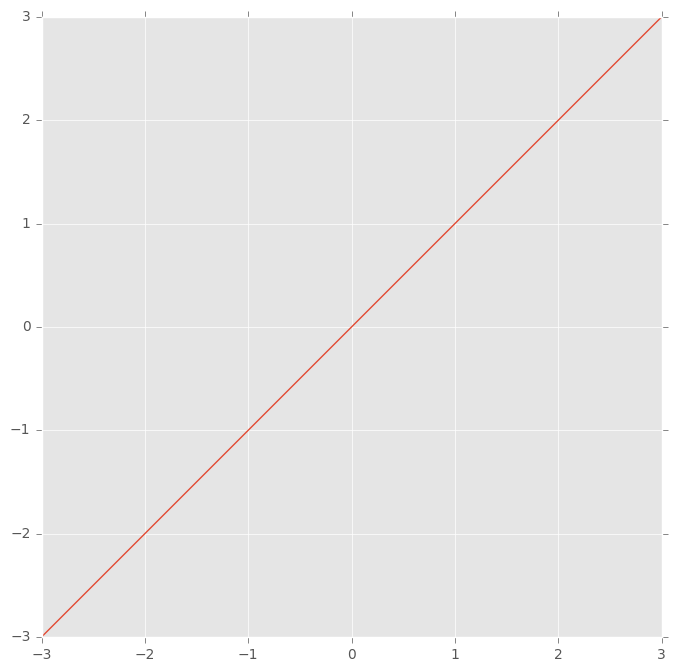

In [4]:
plt.plot(x, linear(x))

In [5]:
def binary(x):
    return x > 0

(-3, 3)

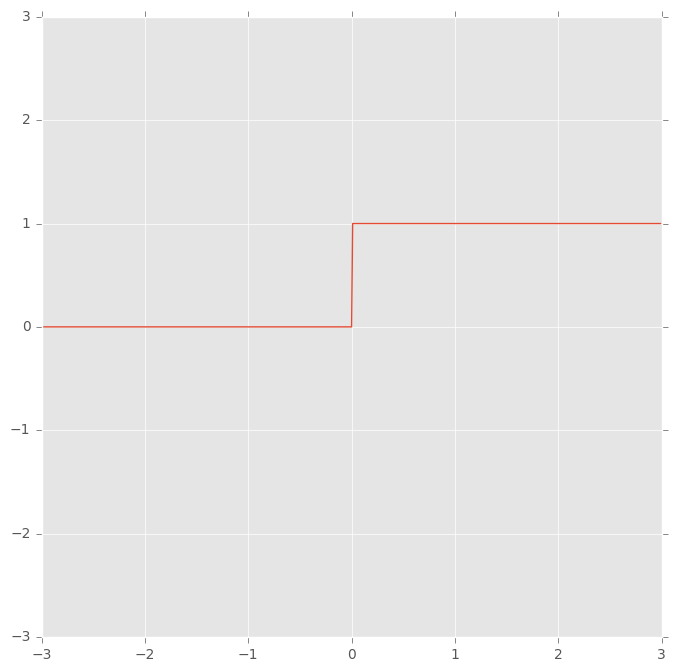

In [6]:
plt.plot(x, binary(x))
plt.ylim([-3, 3])

In [7]:
def relu(x):
    return (x > 0) * x

(-3, 3)

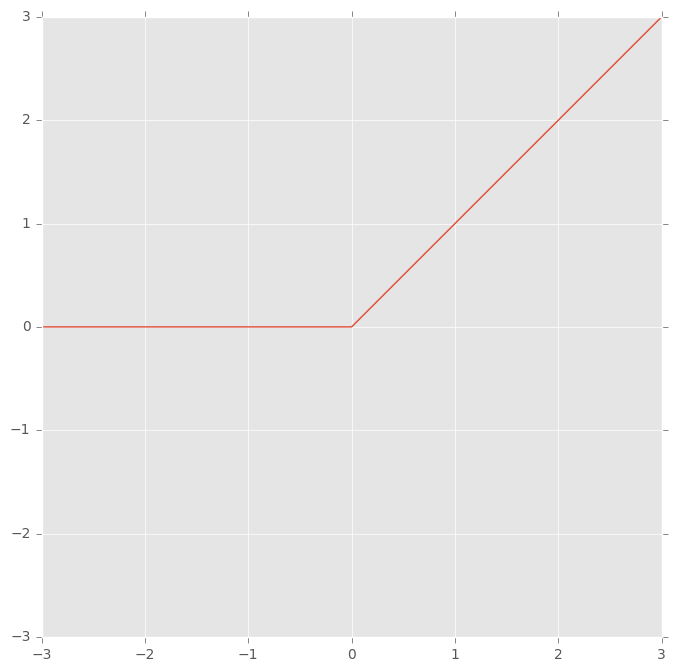

In [8]:
plt.plot(x, relu(x))
plt.ylim([-3, 3])

(-3, 3)

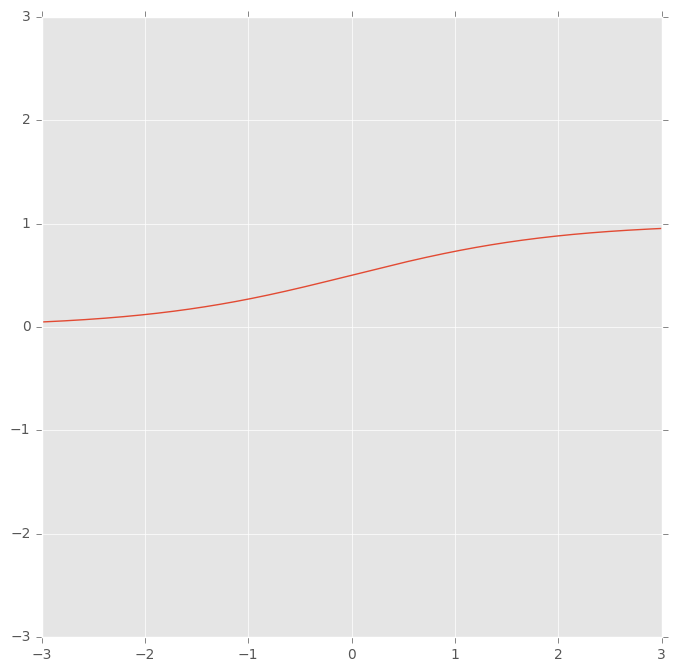

In [9]:
from scipy.special import expit
plt.plot(x, expit(x))
plt.ylim([-3, 3])

(-3, 3)

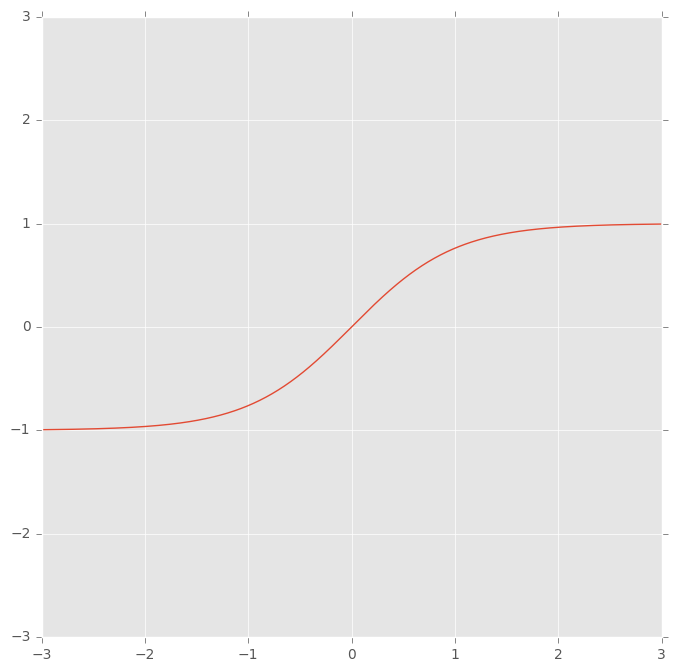

In [10]:
plt.plot(x, np.tanh(x))
plt.ylim([-3, 3])

(-0.5, 1.5)

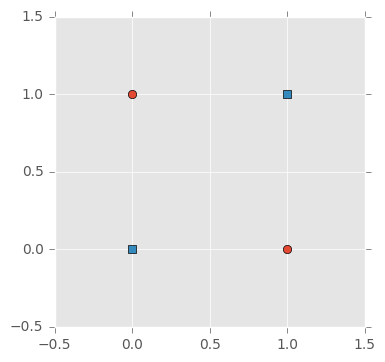

In [11]:
rcParams['figure.figsize'] = 4, 4
plt.plot([0, 1], [1, 0], 'o', [0, 1], [0, 1], 's')
plt.ylim([-0.5, 1.5])
plt.xlim([-0.5, 1.5])

# Build Neural Network Model

In [25]:
rcParams['figure.figsize'] = 8, 4

In [ ]:
import tensorflow as tf
from tensorflow.contrib.layers import xavier_initializer, l2_regularizer

In [13]:
import mnist
mn = mnist.read_data_sets("MNIST_data/", one_hot=True)
trX, trY, teX, teY = mn.train.images, mn.train.labels, mn.test.images, mn.test.labels

('Extracting', 'MNIST_data/train-images-idx3-ubyte.gz')
('Extracting', 'MNIST_data/train-labels-idx1-ubyte.gz')
('Extracting', 'MNIST_data/t10k-images-idx3-ubyte.gz')
('Extracting', 'MNIST_data/t10k-labels-idx1-ubyte.gz')


/usr/local/lib/python2.7.12/lib/python2.7/gzip.py:275: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  chunk = self.extrabuf[offset: offset + size]
mnist.py:42: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  data = data.reshape(num_images, rows, cols, 1)


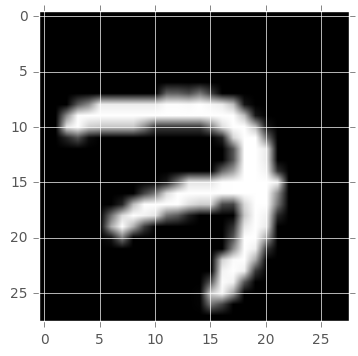

In [26]:
plt.imshow(np.array(trX[0]*256, dtype=np.uint8).reshape((28, 28)), cmap='gray')

In [29]:
X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])

with tf.device('/gpu:0'):
    wh = tf.Variable(tf.random_normal([784, 625], stddev=0.1))
    wo = tf.Variable(tf.random_normal([625, 10], stddev=0.1))

    A = tf.matmul(X, wh)
    H = tf.sigmoid(A)
    Py = tf.matmul(H, wo)

    ce_loss = tf.nn.softmax_cross_entropy_with_logits(Py, Y)
    cost = tf.reduce_mean(ce_loss)
    train_op = tf.train.GradientDescentOptimizer(0.05).minimize(ce_loss)
    predict_op = tf.argmax(Py, 1)

with tf.Session() as sess:
    accu = []
    tf.global_variables_initializer().run()
    for epoch in range(100):
        for start, end in zip(range(0, len(trX), 128), range(128, len(trX), 128)):
            sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        # print epoch, np.mean(np.argmax(teY, axis=1) == sess.run(predict_op, feed_dict={X: teX, Y: teY}))
        accu.append(np.mean(np.argmax(teY, axis=1) == sess.run(predict_op, feed_dict={X: teX, Y: teY})))
    print 'best accuracy: ', max(accu)

best accuracy:  0.9669


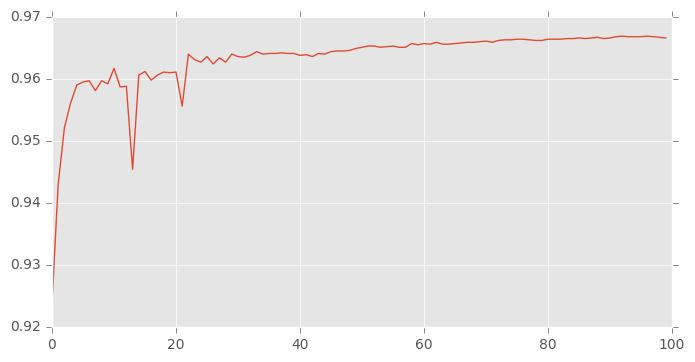

In [30]:
plt.plot(accu)